# [Recipe1M](http://im2recipe.csail.mit.edu) data set analysis
Analysis of dataset should contain: 
* [Plantuml](https://plantuml.com/de/json) diagram of json structure 
* Amount of recipes
* Plots:
 * Num of Instructions
 * Num of Ingredients
 * Most used words in Instructions
 * Most used words in Ingedients
 * (Optional) Kind of dish

In [1]:
import json
import matplotlib.pyplot as plt
import re

In [2]:
charsToRemove = "[,.*®©™()?!:;+]"
fractionRegex = re.compile("[0-9]+/[0-9]+")
# Counts words in a given list (ingredients/instructions) and returns their occurence in a dictionary
# Filters numbers (such as 1 apple or 1/2 apple) and puts them into 'numeric' category
def countWords(list, words_dict):
    for elem in list:
        text = elem['text']
        strippedText = re.sub(charsToRemove, "", text.lower())
        for word in strippedText.split():
            if word.isnumeric() or re.match(fractionRegex, word):
                words_dict['numeric'] = words_dict.setdefault('numeric', 0) + 1
            else:
                words_dict[word] = words_dict.setdefault(word, 0) + 1
    return words_dict

In [3]:
# import nltk
# nltk.download()

# def countNouns(list, nouns_dict):
#     for elem in list:
#         tokenized_text = nltk.pos_tag(nltk.word_tokenize(elem['text']))
#         for word, kind in tokenized_text:
#             if kind == 'NN':
#                 nouns_dict[word] = nouns_dict.setdefault(word, 0) + 1
#     return nouns_dict


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [4]:
# Load data:
# Underlying type: list
# -- Recipe : dict
# --- ingredients : list
# ---- ingredient : dict (size 1: 'text': 'ingredient string')
# --- instructions : list
# ---- instruction : dict (size 1: 'text': 'instruction string')
# --- url : str
# --- id : str
# --- title : str
# --- partition : str

data = json.load(open('layer1.json'))
num_recipes = len(data)
print(f'Total number of recipes: {num_recipes}')


Total number of recipes: 30


In [5]:
words_in_ingredients = {}
words_in_instructions = {}

nouns_in_ingredients = {}

ingredients_per_recipe = {}
instructions_per_recipe = {}

recipe_websites = {}

total_ingredients = 0
total_instructions = 0

for recipe in data:
    ingredients = recipe['ingredients']
    instructions = recipe['instructions']
    website = recipe['url'].split("/")[2]
    num_ingredients = len(ingredients)
    num_instructions = len(instructions)
    total_ingredients += len(ingredients)
    total_instructions += len(instructions)
    words_in_ingredients = countWords(ingredients, words_in_ingredients)
    words_in_instructions = countWords(instructions, words_in_instructions)

    ingredients_per_recipe[num_ingredients] = ingredients_per_recipe.setdefault(num_ingredients, 0) + 1
    instructions_per_recipe[num_instructions] = instructions_per_recipe.setdefault(num_instructions, 0) + 1
    recipe_websites[website] = recipe_websites.setdefault(website, 0) + 1

    #nouns_in_ingredients = countNouns(ingredients, nouns_in_ingredients)


print(f'Total number of ingredients: {total_ingredients}')
print(f'Total number of instructions: {total_instructions}')
print(f'Number of different words in ingredients: {len(words_in_ingredients)}')
print(f'Number of numeric expressions in ingredients: {words_in_ingredients["numeric"]}')
print(f'Number of different words in instructions: {len(words_in_instructions)}')
print(f'Number of numeric expressions in instructions: {words_in_instructions["numeric"]}')


Total number of ingredients: 259
Total number of instructions: 276
Number of different words in ingredients: 396
Number of numeric expressions in ingredients: 291
Number of different words in instructions: 734
Number of numeric expressions in instructions: 120


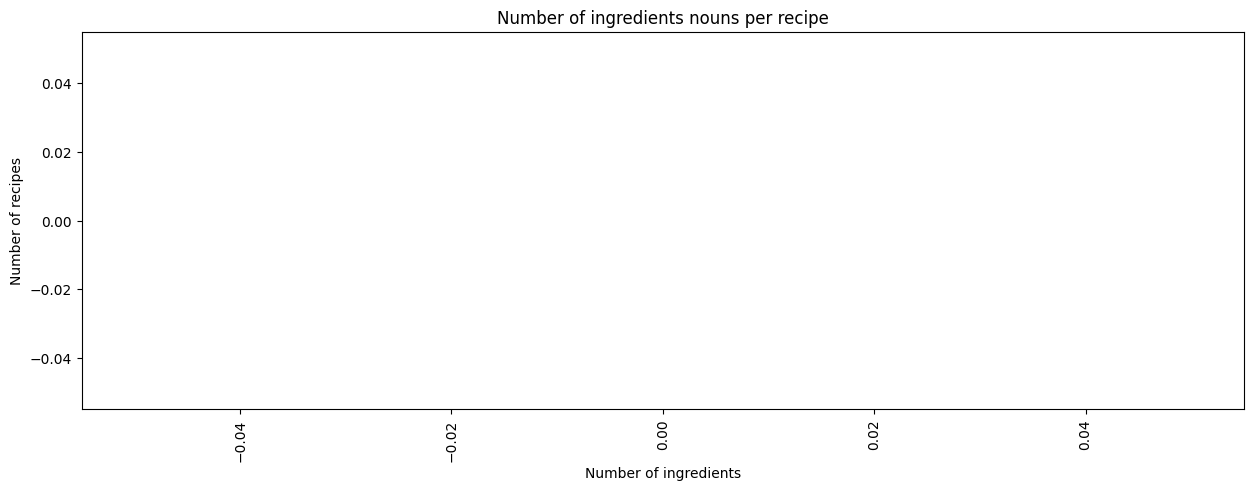

In [6]:
# plt.figure(figsize=(15,5), dpi=100)
# plt.title("Number of ingredients nouns per recipe")
# plt.xlabel("Number of ingredients")
# plt.ylabel("Number of recipes")
# plt.xticks(rotation='vertical')
# plt.bar(nouns_in_ingredients.keys(), nouns_in_ingredients.values(), align='center')
# plt.show()

## Recipe statistics

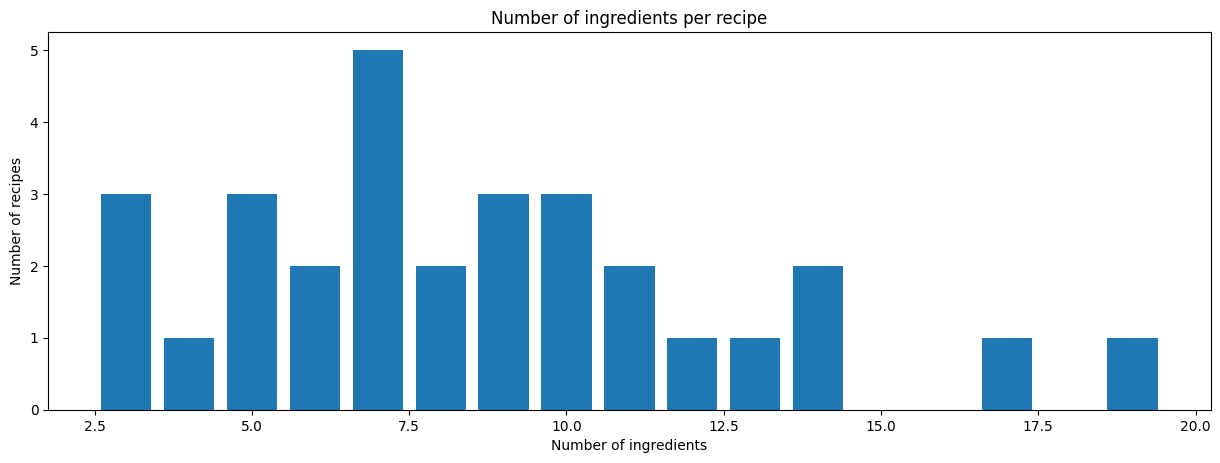

In [7]:
plt.figure(figsize=(15,5), dpi=100)
plt.title("Number of ingredients per recipe")
plt.xlabel("Number of ingredients")
plt.ylabel("Number of recipes")
plt.bar(ingredients_per_recipe.keys(), ingredients_per_recipe.values(), align='center')
plt.show()

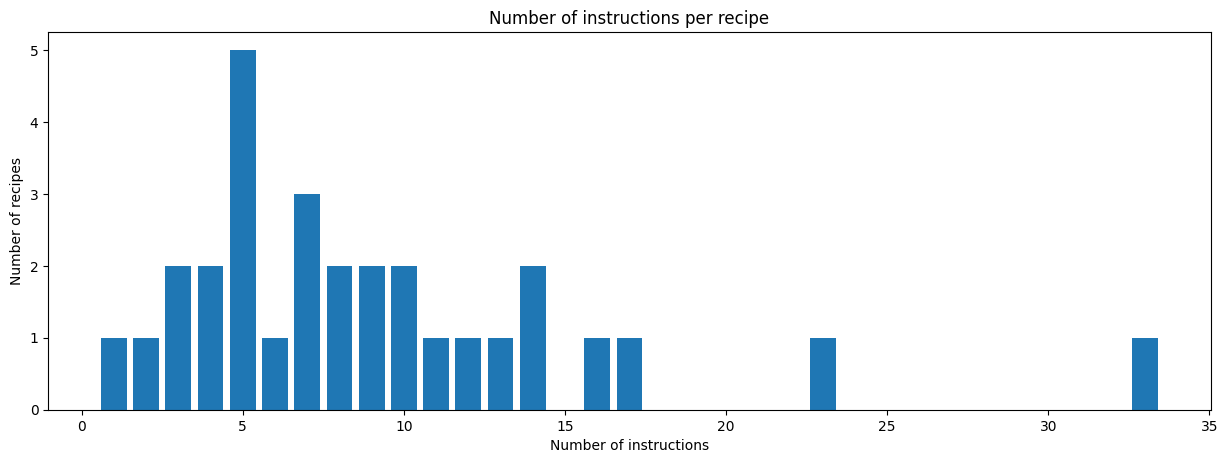

In [8]:
plt.figure(figsize=(15,5), dpi=100)
plt.title("Number of instructions per recipe")
plt.xlabel("Number of instructions")
plt.ylabel("Number of recipes")
plt.bar(instructions_per_recipe.keys(), instructions_per_recipe.values(), align='center')
plt.show()

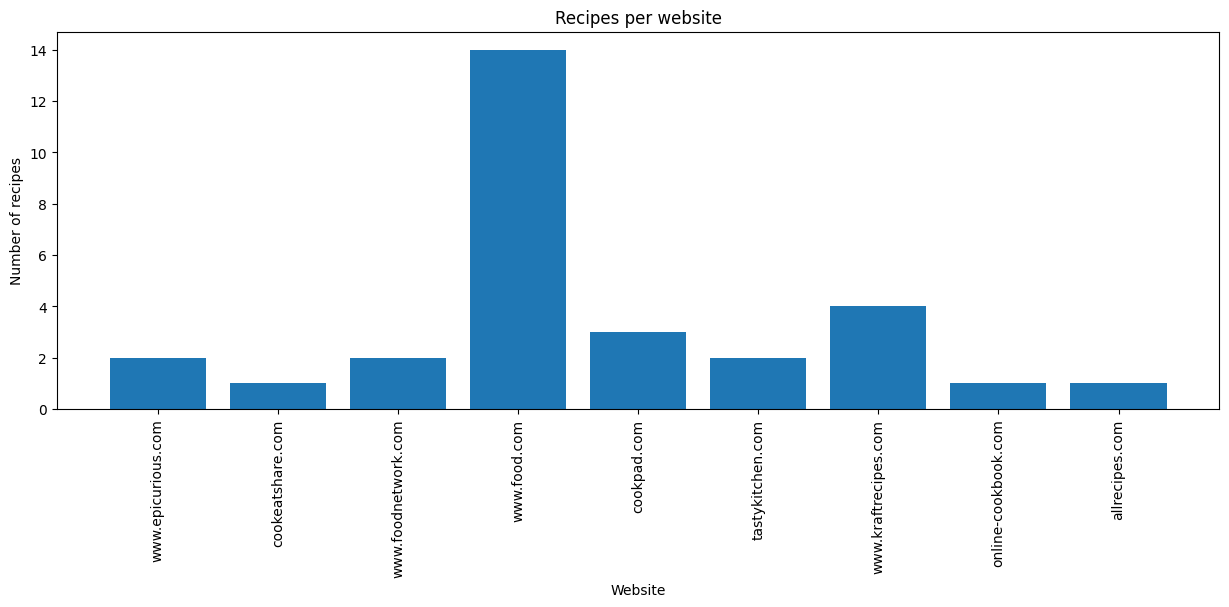

In [9]:
plt.figure(figsize=(15,5), dpi=100)
plt.title("Recipes per website")
plt.xlabel("Website")
plt.ylabel("Number of recipes")
plt.xticks(rotation='vertical')
plt.bar(recipe_websites.keys(), recipe_websites.values(), align='center')
plt.show()

## Ingredients
### Including numeric category

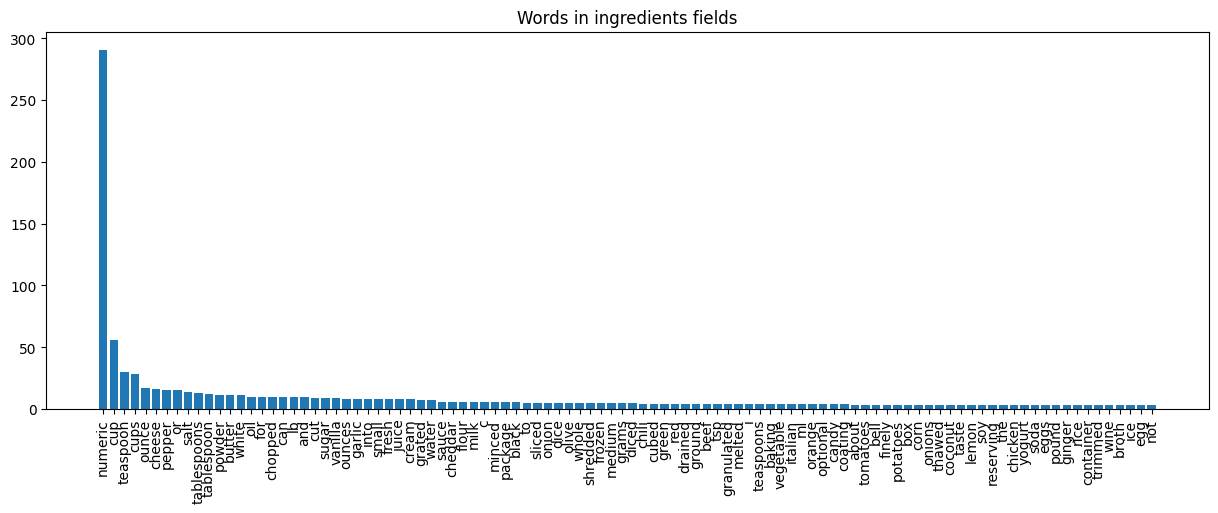

In [10]:
# Plot for ingredients words
# Sort and strip to 100 most used
words_in_ingredients_stripped = sorted(words_in_ingredients.items(), key=lambda x:x[1], reverse=True)[:101]

ingredients_words, ingredients_words_amounts = zip(*words_in_ingredients_stripped)
ingredients_words = list(ingredients_words)
ingredients_words_amounts = list(ingredients_words_amounts)
# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in ingredients fields")
plt.bar(ingredients_words[:100], ingredients_words_amounts[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

### Excluding numeric category

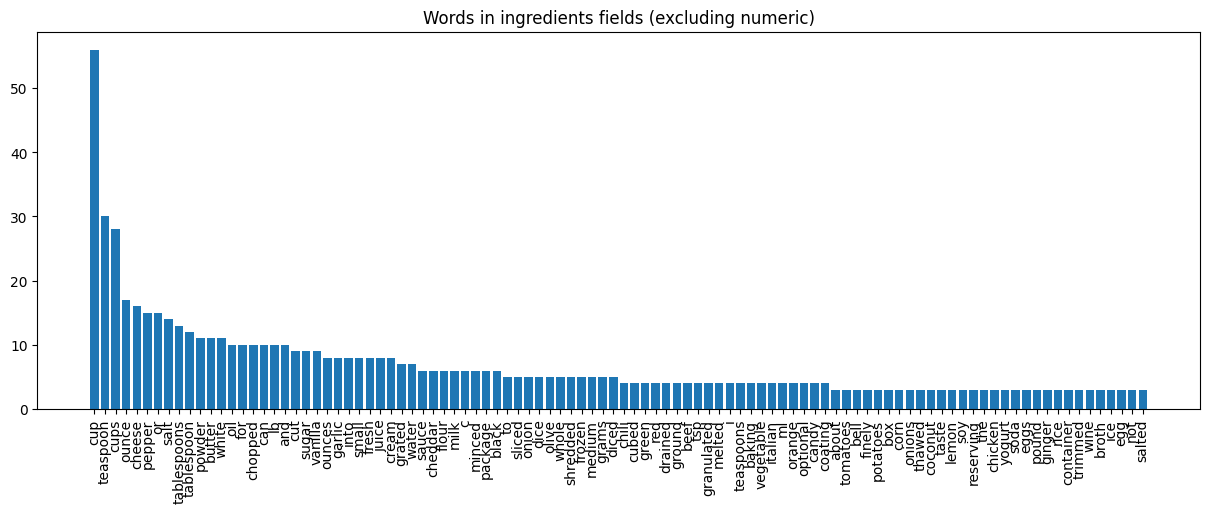

In [11]:
i = ingredients_words.index('numeric')
del ingredients_words[i]
del ingredients_words_amounts[i]

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in ingredients fields (excluding numeric)")
plt.bar(ingredients_words, ingredients_words_amounts, align='center')
plt.xticks(rotation='vertical')
plt.show()

### Nouns only

In [ ]:
# plt.figure(figsize=(15,5), dpi=100)
# plt.title("Number of ingredients nouns per recipe")
# plt.xlabel("Number of ingredients")
# plt.ylabel("Number of recipes")
# plt.xticks(rotation='vertical')
# plt.bar(nouns_in_ingredients.keys(), nouns_in_ingredients.values(), align='center')
# plt.show()

## Ingredients
### Including numeric category

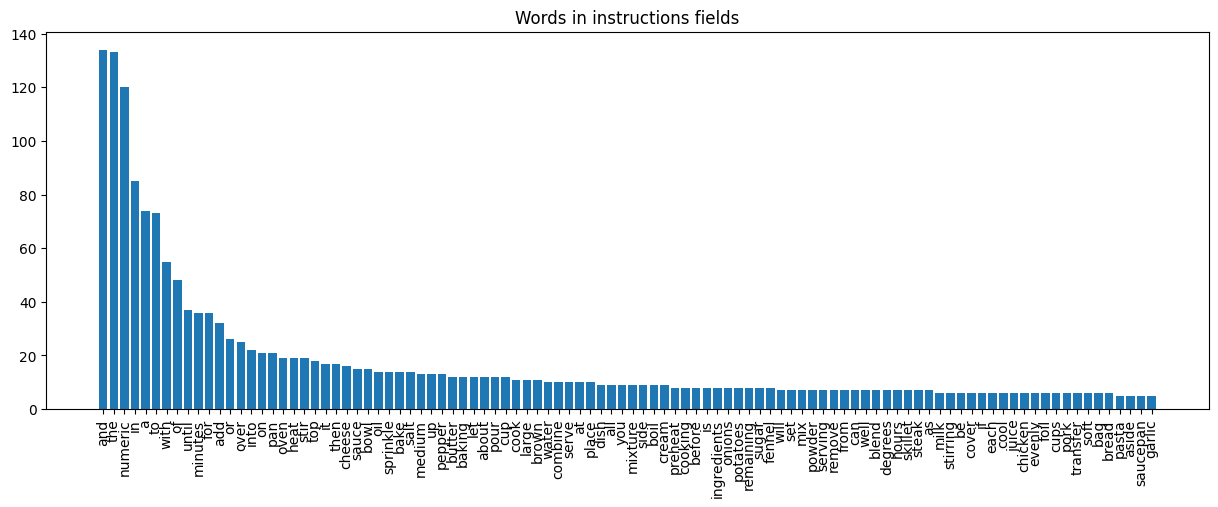

In [12]:
# Plot for instructions words
# Sort and strip to 100 most used
words_in_instructions_stripped = sorted(words_in_instructions.items(), key=lambda x:x[1], reverse=True)[:101]

instructions_words, instructions_words_amounts = zip(*words_in_instructions_stripped)
instructions_words = list(instructions_words)
instructions_words_amounts = list(instructions_words_amounts)

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in instructions fields")
plt.bar(instructions_words[:100], instructions_words_amounts[:100], align='center')
plt.xticks(rotation='vertical')
plt.show()

### Excluding numeric category

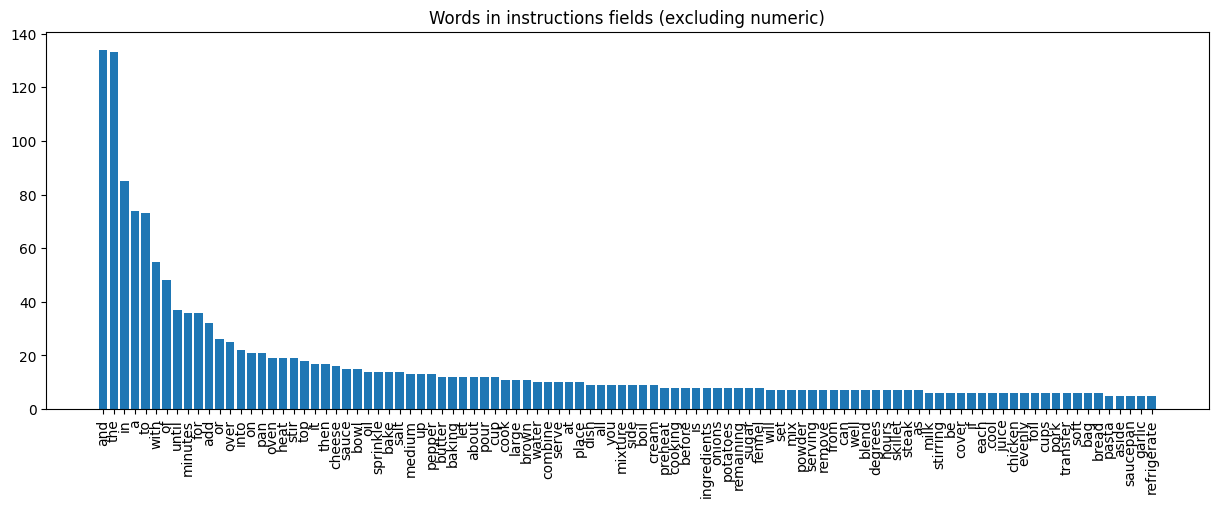

In [13]:
i = instructions_words.index('numeric')
del instructions_words[i]
del instructions_words_amounts[i]

# Plot
plt.figure(figsize=(15,5), dpi=100)
plt.title("Words in instructions fields (excluding numeric)")
plt.bar(instructions_words, instructions_words_amounts, align='center')
plt.xticks(rotation='vertical')
plt.show()